### 의사결정방법
- 전처리 의미 없음
- 균일한 데이터로 분류 / 회귀하는 것
- 규칙 => 피쳐 / 특성들이 얼마나 데이터를 균일하게 잘 나누어 주는가
- 하이퍼파라미터 많음

#### [1] 데이터 준비 및 확인

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

from sklearn.tree import plot_tree, export_graphviz, export_text

import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# 데이터 로딩
irisBunch = load_iris()

In [39]:
for _key in irisBunch.keys():
    print(f'[{_key}]\n{irisBunch[_key]}')

[data]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9

In [40]:
# 분류용 데이터 분리 => 데이터 + 타겟/라벨/클래스
data = irisBunch['data']
target = irisBunch['target']

In [41]:
data.shape, target.shape

((150, 4), (150,))

#### [2] 학습용 데이터 분리 => 학습 데이터 & 테스트 데이터

In [42]:
# train : test = 80 : 20
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1, train_size=0.8)

In [43]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [44]:
X_test.shape, y_test.shape

((30, 4), (30,))

#### [3] 학습 모델 객체 생성 및 학습

In [45]:
dtModel = DecisionTreeClassifier(max_depth=2, criterion='entropy', splitter='random')
dtModel.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, splitter='random')

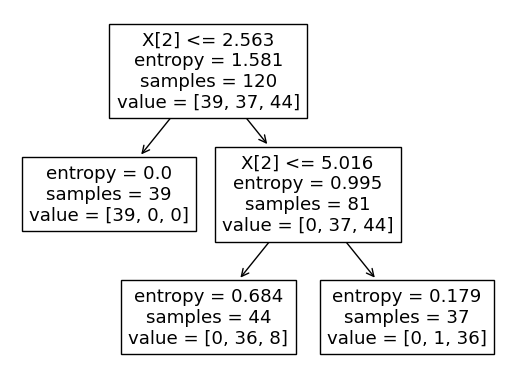

In [46]:
# 학습된 트리 구조 확인 - Graph
plot_tree(dtModel)
plt.savefig('default_tree.jpg')

In [47]:
# 학습된 트리 구조 확인 - Text 
print(export_text(dtModel))

|--- feature_2 <= 2.56
|   |--- class: 0
|--- feature_2 >  2.56
|   |--- feature_2 <= 5.02
|   |   |--- class: 1
|   |--- feature_2 >  5.02
|   |   |--- class: 2



In [48]:
export_graphviz(dtModel, out_file='dtModel.dot', filled=True)

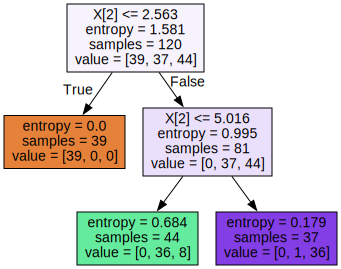

In [49]:
# dot 파일 => 시각화 이미지
import graphviz as gp

# str 데이터 추출
with open('dtModel.dot') as f:
    dot_graph = f.read()

# 이미지로 변환 & 저장
gp.Source(dot_graph)
# g.render(filename = 'dot', format = 'bmp')

In [50]:
# 이미지 저장
# gp.Source(dot_graph).render(filename='dot', format='bmp')

#### DT 모델 학습 후 주요 속성 확인

In [51]:
dtModel.max_features_

4

In [52]:
dtModel.classes_

array([0, 1, 2])

In [53]:
# Importance of feature
dtModel.feature_importances_

array([0., 0., 1., 0.])

In [54]:
dtModel.n_features_in_

4